All Trump's Twitter insults (2015-2021)8

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
trump = pd.read_csv("E:/github/All Trump's Twitter insults/trump_insult_tweets_2014_to_2021.csv")
trump = trump.drop('Unnamed: 0', axis=1)


Description of features

    date - day that the tweet was released
    target - subject of ridicule in tweet
    insult - offensive statement
    tweet - corpus of text released by Trump


In [3]:
trump.head()

date          target  \
0  2014-10-09  thomas-frieden   
1  2014-10-09  thomas-frieden   
2  2015-06-16     politicians   
3  2015-06-24      ben-cardin   
4  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

Target

In [4]:
count = Counter(trump['target'])
count = pd.Series(count)
df1 = pd.DataFrame({'Target':count.keys(), 'Number of insults':count}).sort_values(
    ascending=False, by='Number of insults')
df1 = df1[df1['Number of insults']>50]

fig = px.bar(df1, 'Target', 'Number of insults', color='Number of insults', title='Target of insult')
fig.show()

Insult

In [5]:
count = Counter(trump['insult'])
count = pd.Series(count)
df2 = pd.DataFrame({'Insult':count.keys(), 'Number of insults':count}).sort_values(
    ascending=False, by='Number of insults')
df2 = df2[df2['Number of insults']>18]

fig = px.bar(df2, 'Insult', 'Number of insults', color='Number of insults', title='Type of insult', height=700)
fig.show()

Insult per target

In [6]:
for target in df1['Target'].iloc[:5]:
    count = Counter(trump[trump['target']==target]['insult'])
    count = pd.Series(count)
    d = pd.DataFrame({'Insult':count.keys(), 'Number of insults':count}).sort_values(
        ascending=False, by='Number of insults')
    d = d[d['Number of insults']>3]

    fig = px.bar(d, 'Insult', 'Number of insults', color='Number of insults', title=target)
    fig.show()

Tweets per month

In [7]:
count = Counter([i[:7] for i in trump['date']])
df = pd.DataFrame({'Date of tweet':count.keys(), 'Number of tweets':count.values()})
fig = px.line(df, 'Date of tweet', 'Number of tweets', title='Tweets per month')
fig.show()

Average number of words per tweet

In [8]:
months = []
datas = []
trump['year'] = [o[:4] for o in trump['date']]
for i in trump.groupby('year'):
    i[1]['month'] = [j[5:7] for j in i[1]['date']]
    for k in i[1].groupby('month'):
        months.append(i[0]+'-'+k[0])
        datas.append(k[1]['tweet'])
        
month_list = []
for i in datas:
    length = len(list(i))
    month_count = 0 
    for j in i:
        month_count += len(j.split(' '))
    month_list.append(round(month_count/length, 2))

In [9]:
df = pd.DataFrame({'Date of tweet':months, 'Average number of words per tweet':month_list})
fig = px.line(df, 'Date of tweet', 'Average number of words per tweet', title='Number of words in tweets per month')
fig.show()

Number of tweets per target

In [10]:
years = []
for target in df1.iloc[:5]['Target']:
    temp = []
    for i in trump[trump['target'] == target]['date']:
        temp.append(i[:7])
    years.append(temp)

for target in years:
    name = df1['Target'].iloc[years.index(target)]
    count = Counter(target)
    df = pd.DataFrame({'Date of tweet':count.keys(), 'Number of tweets against '+name:count.values()})
    fig = px.line(df, 'Date of tweet', 'Number of tweets against '+name, title=name)
    fig.show()

Number of tweets per insult

In [11]:
years = []
for target in df2.iloc[:5]['Insult']:
    temp = []
    for i in trump[trump['insult'] == target]['date']:
        temp.append(i[:7])
    years.append(temp)

for target in years:
    name = df2['Insult'].iloc[years.index(target)]
    count = Counter(target)
    df = pd.DataFrame({'Date of tweet':count.keys(), 'Number of tweets against '+name:count.values()})
    fig = px.line(df, 'Date of tweet', 'Number of tweets against '+name, title=name)
    fig.show()

Percentage of insults over the years

In [12]:
count = Counter([int(i[:4]) for i in trump['date']])
df = pd.DataFrame({'Year':count.keys(), 'Number of tweets':count.values()})
fig = px.pie(df, 'Year', 'Number of tweets')
fig.update_layout(legend_title=dict(text='Years', font=dict(size=18)))
fig.show()

Percentage of insults per months over the years

In [13]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trump['year'] = [int(i[:4]) for i in trump['date']]

for year in trump.groupby('year'):
    count = Counter([int(j[5:7]) for j in year[1]['date']])
    df = pd.DataFrame({'Month':count.keys(), 'Number of tweets':count.values()})

    month_list = []
    for i in df['Month']:
        month_list.append(months[int(i-1)])
    df['Month'] = month_list

    fig = px.pie(df, 'Month', 'Number of tweets')
    fig.update_layout(legend_title=dict(text='Months in '+str(year[0]), font=dict(size=18)))
    fig.show()

Wordclouds for most common words

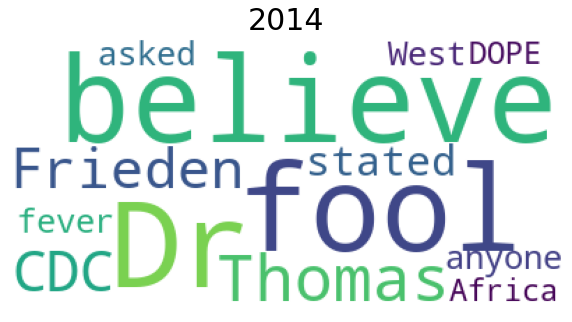

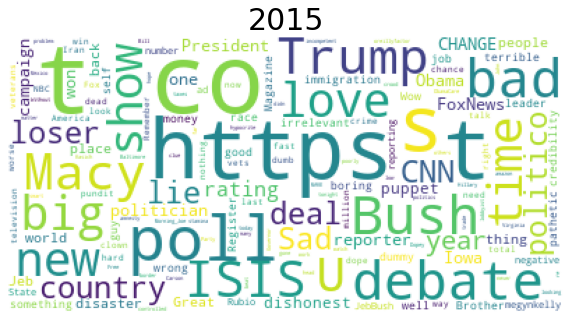

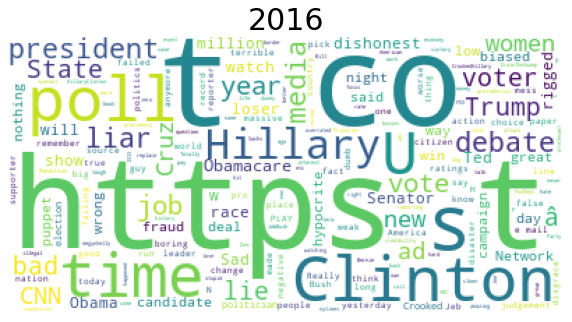

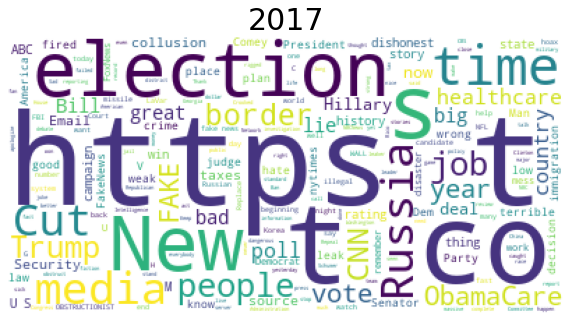

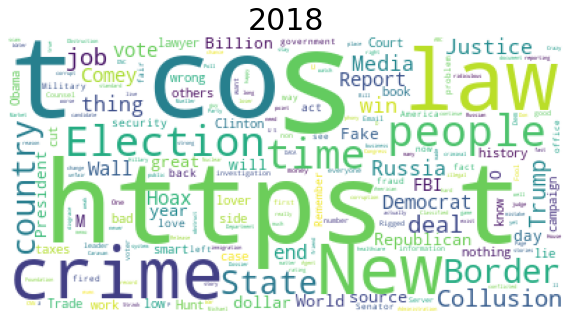

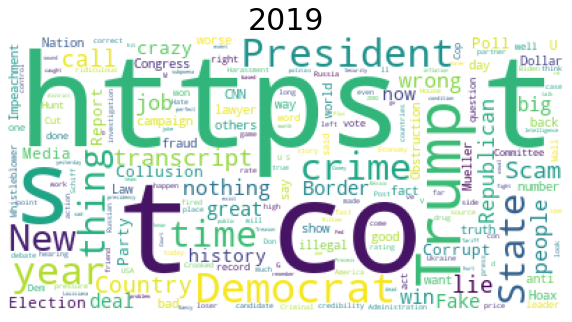

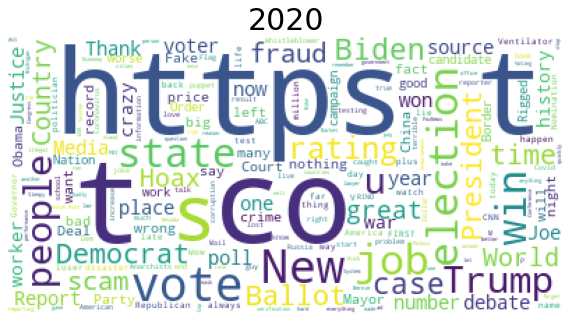

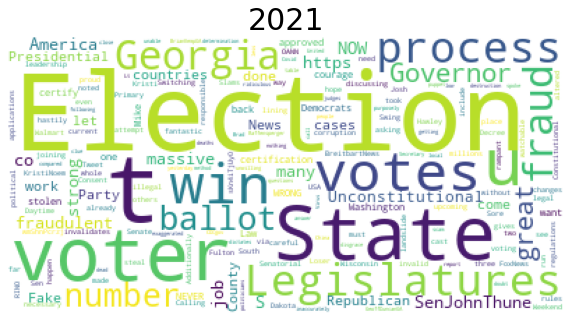

In [14]:
for year in trump.groupby('year'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    total = []
    tweet = year[1]['tweet']
    for corpus in tweet:
        for i in corpus.split(' '):
            total.append(i)
    count = Counter(total)
    total = list(count.keys())
    words = ' '.join(total)
    wordcloud = WordCloud(background_color='white').generate(words)
    ax.imshow(wordcloud)
    ax.set_title(year[0], size=30)
    ax.axis('off')
    plt.show()

Predicting target based on tweet

In [15]:
trump = pd.merge(trump, pd.get_dummies(trump['insult']), left_index=True, right_index=True)
trump = trump.drop('insult', axis=1)
trump = trump.fillna('null')
trump['target'] = LabelEncoder().fit_transform(trump['target'])

In [16]:
X = trump['tweet']
y = trump['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

model = LinearSVC()
model.fit(X_train, y_train)
print('Model score:    ', model.score(X_test, y_test))
print('Cross val score:',cross_val_score(model, X_test, y_test).mean())

Model score:     0.6385135135135135


C:\Users\ubjd\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Cross val score: 0.550697863919446


Democrats and Republicans

In [17]:
data = pd.read_csv("E:/github/All Trump's Twitter insults/ExtractedTweets.csv")
data.head()

Party         Handle                                              Tweet
0  Democrat  RepDarrenSoto  Today, Senate Dems vote to #SaveTheInternet. P...
1  Democrat  RepDarrenSoto  RT @WinterHavenSun: Winter Haven resident / Al...
2  Democrat  RepDarrenSoto  RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3  Democrat  RepDarrenSoto  RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4  Democrat  RepDarrenSoto  RT @Vegalteno: Hurricane season starts on June...


Description of features

    Party - Political party of politician
    Handle - Politican twitter handle
    Tweet - Corpus of tweet


Number of tweets per party

In [18]:
count = Counter(data['Party'])
df = pd.DataFrame({'Party': count.keys(), 'Number of tweets': count.values()})
fig = px.pie(df, 'Party', 'Number of tweets')
fig.update_layout(legend_title=dict(text='Party', font=dict(size=18)))
fig.show()

Wordcloud for 10 politicians

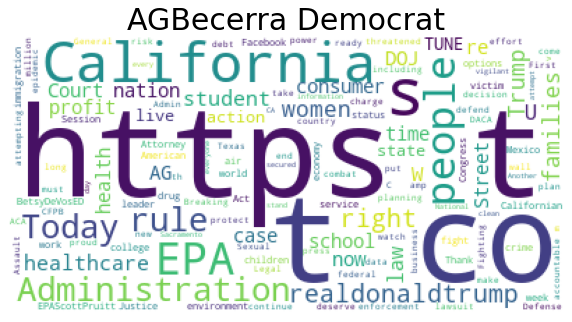

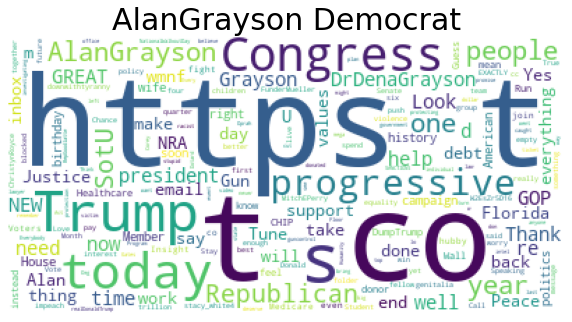

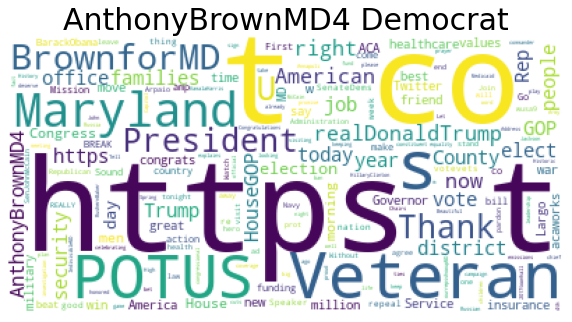

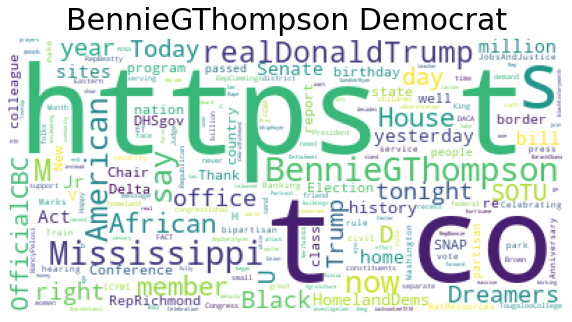

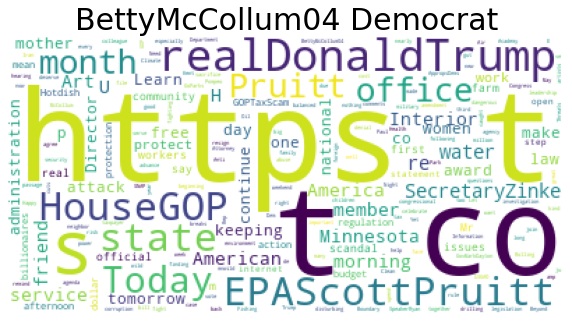

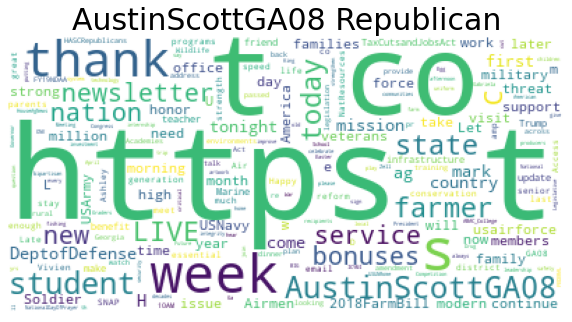

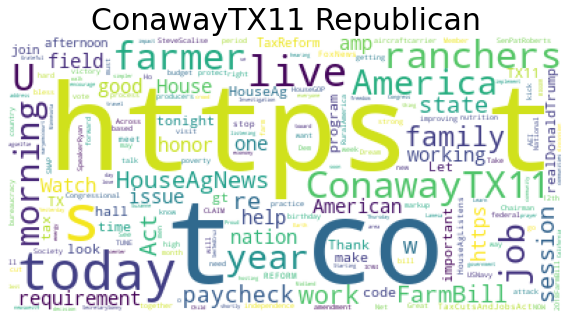

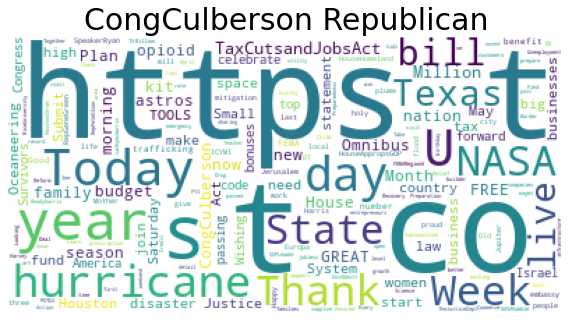

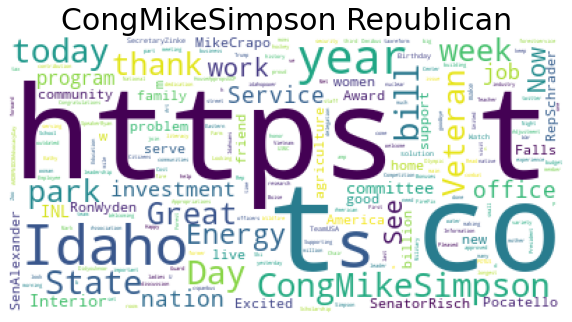

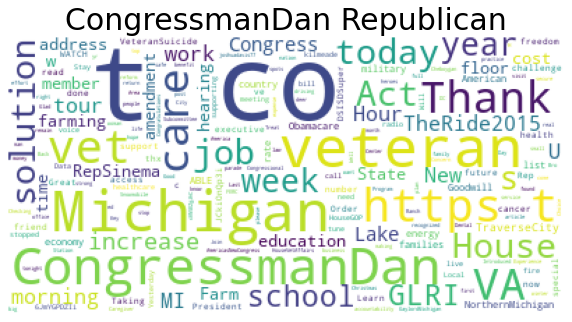

In [19]:
users = {'Democrat':[], 'Republican':[]}
for party in ['Democrat', 'Republican']:
    r = 0
    for person in np.unique(data['Handle']):
        if np.array(data[data['Handle']==person]['Party'])[0]==party:
            if r == 5:
                break
            else:
                users[party].append(person)
                tweet = data[data['Handle']==person]['Tweet']
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                total = []
                for corpus in tweet:
                    for i in corpus.split(' '):
                        total.append(i)
                count = Counter(total)
                total = list(count.keys())
                words = ' '.join(total)

                wordcloud = WordCloud(background_color='white').generate(words)
                ax.imshow(wordcloud)
                ax.set_title(person+' '+np.array(data[data['Handle']==person]['Party'])[0], size=30)
                ax.axis('off')
                plt.show()
            r += 1

Number of words in tweets per politician

In [20]:
party_counts = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
for party in users:
    for user in users[party]:
        for tweet in data[data['Handle']==user]['Tweet']:
            length = len(tweet.split(' '))
            party_counts[list(users.keys()).index(party)][users[party].index(user)] += length
            
for values in party_counts:
    party = list(users.keys())[party_counts.index(values)]
    labels = users[party]
    
    df = pd.DataFrame({'User':labels, 'Number of words in tweets':values})
    fig = px.pie(df, 'User', 'Number of words in tweets')
    fig.update_layout(legend_title=dict(text=party, font=dict(size=18)))
    fig.show()